In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, roc_auc_score
)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文黑体
plt.rcParams['axes.unicode_minus'] = False   # 正确显示负号

In [2]:
df = pd.read_excel(r"E:\BaiduSyncdisk\A-研究生学习\6-22任务\数据集及文献\2斯格明子数据集.xlsx")
print(df.columns.tolist())

['Formula化学式', '一周期元素', '二周期元素', '三周期元素', '四周期元素', '五周期元素', '六周期元素', '稀土元素', 'Label_1', 'Label_2', 'Label_3', 'Label_4', 'Label_5', 'Label_6', '晶体结构', 'Label_7', '磁结构', '磁结构代号(斯格明子为1，非斯格明子为0）', '各向异性常数（ J/m³）', '饱和磁化强度（T）', '居里温度（K）', '磁结构代号(铁磁设为1、反铁磁设为2、亚铁磁设为3、螺旋包括斯格明子设为4、锥形设为5）', '磁结构代号(线性0非线性1）', '居里温度（K）.1', '能带带隙', '基态能量', '磁矩', 'Label_1.1', 'Label_1.2']


In [3]:
features=[
'Label_1', 'Label_2', 'Label_3', 'Label_4', 'Label_5', 'Label_6','Label_7'
]
target='磁结构代号(斯格明子为1，非斯格明子为0）'

In [4]:
X = df[features].values
y = df[target].values.reshape(-1, 1).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##预处理 $$x_{\text{scaled}} = \frac{x - \mu}{\sigma}$$

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 训练神经网络（MLPClassifier）

In [6]:
clf = MLPClassifier(hidden_layer_sizes=(20, 10), activation='relu', solver='adam', max_iter=1000, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Confusion Matrix ===
[[62  3]
 [ 2 68]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        65
           1       0.96      0.97      0.96        70

    accuracy                           0.96       135
   macro avg       0.96      0.96      0.96       135
weighted avg       0.96      0.96      0.96       135



In [7]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

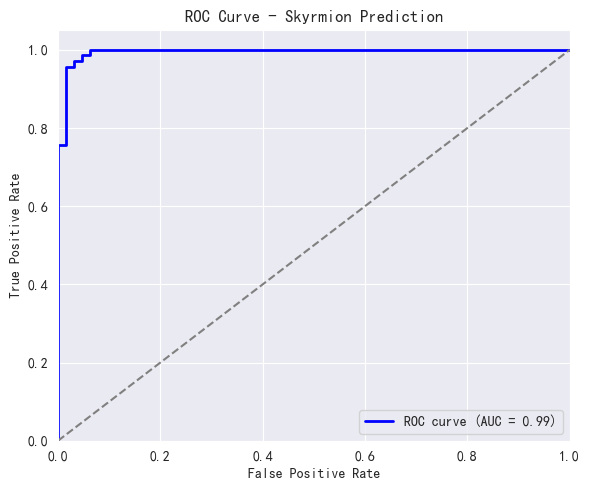

In [8]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Skyrmion Prediction")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

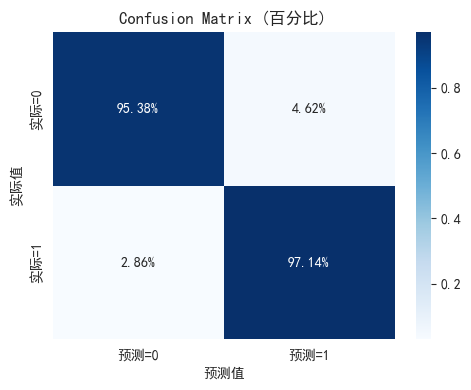

In [9]:
# === 混淆矩阵百分比表示（可视化） ===
cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(5, 4))
sns.heatmap(cm_percent, annot=True, fmt=".2%", cmap="Blues", xticklabels=["预测=0", "预测=1"], yticklabels=["实际=0", "实际=1"])
plt.title("Confusion Matrix (百分比)")
plt.xlabel("预测值")
plt.ylabel("实际值")
plt.tight_layout()
plt.show()

## 预测设想中的材料
不知道晶体结构所以1-6全部测试

In [14]:
df2= pd.read_excel(r"E:\BaiduSyncdisk\A-研究生学习\6-22任务\数据集及文献\设想数据输入.xlsx")
print(df2.columns.tolist())

['Unnamed: 0', ' Label-1', 'Label-2', 'Label-3', 'Label-4', 'Label-5', 'Label-6', 'label-7']


In [19]:
new_rows = []
for index, row in df2.iterrows():
    for i in range(1, 7):
        new_row = row.copy()
        new_row.iloc[7] = i  
        new_rows.append(new_row)
new_df = pd.DataFrame(new_rows)

In [23]:
features_js=[
' Label-1', 'Label-2', 'Label-3', 'Label-4', 'Label-5', 'Label-6', 'label-7'
]
X_js=new_df[features_js].values
scaler2 = StandardScaler()
X_js=scaler2.fit_transform(X_js)
y_js=clf.predict(X_js)
y_js_prob=clf.predict_proba(X_js)[:,1]

In [24]:
new_df['预测结果']=y_js
new_df['预测概率']=y_js_prob
new_df.to_excel(r"E:\BaiduSyncdisk\A-研究生学习\6-22任务\数据集及文献\设想数据输出.xlsx", index=False)